## TensorFlow Estimator API

TensorFlow by default has some models implemented. So you don't have to do it by yourself (like above) These implementations are listen in the Estimator API. It provides various features like training, evaluating, prediction, exporting model, etc. You can also inherit `Estimator` and create your own estimator. 

Steps to using Estimator API:
1. Define list of feature columns.
2. Create the Estimator model. 
3. Create a data input function.
4. Call train, evaluate, and predict on the Estimator object. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

/home/michael/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 1. Define list of feature columns

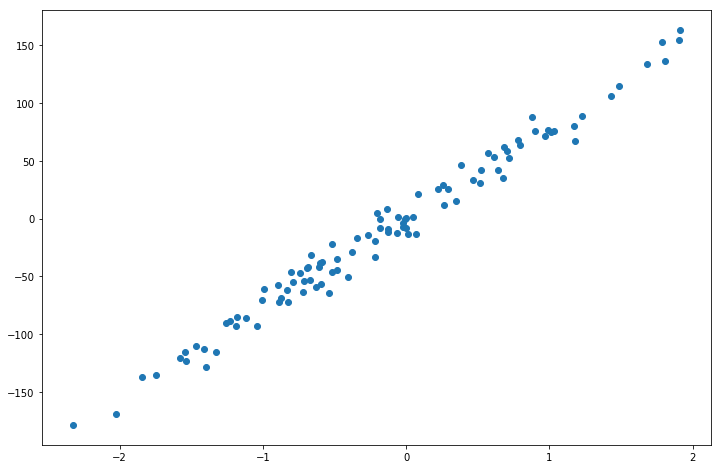

In [3]:
X, y = make_regression(n_features=1, noise=10)
fig = plt.figure(figsize=(12, 8))
plt.scatter(X, y)

In [4]:
# shape = 1 since we only have 1 feature
feat_cols = [tf.feature_column.numeric_column("X", shape=[1])]
# create estimator, pass in the features

### 2. Create Estimator

In [5]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
# ignore the warnings

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1nc6f3x5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0298333c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
# create train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1, 1), test_size=0.2)

### 3. Create data input function

In [8]:
input_function = tf.estimator.inputs.numpy_input_fn({"X": X.ravel()}, y, batch_size=4, shuffle=True, num_epochs=None)

train_input_function = tf.estimator.inputs.numpy_input_fn({"X": X_train}, y_train.reshape(-1, 1), batch_size=8, 
                                                    num_epochs=None, shuffle=False)

test_input_function = tf.estimator.inputs.numpy_input_fn({"X": X_test}, y_test.reshape(-1, 1), batch_size=8, 
                                                    num_epochs=None, shuffle=False)

### 4. Train Estimator

In [9]:
# steps is the maximum number of steps to take
# while training
estimator.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp1nc6f3x5/model.ckpt.
INFO:tensorflow:loss = 6830.7573, step = 1
INFO:tensorflow:global_step/sec: 435.403
INFO:tensorflow:loss = 37412.234, step = 101 (0.241 sec)
INFO:tensorflow:global_step/sec: 483.862
INFO:tensorflow:loss = 14549.085, step = 201 (0.197 sec)
INFO:tensorflow:global_step/sec: 556.258
INFO:tensorflow:loss = 22560.947, step = 301 (0.182 sec)
INFO:tensorflow:global_step/sec: 526.557
INFO:tensorflow:loss = 2831.4712, step = 401 (0.190 sec)
INFO:tensorflow:global_step/sec: 621.778
INFO:tensorflow:loss = 8244.174, step = 501 (0.160 sec)
INFO:tensorflow:global_step/sec: 358.511
INFO:tensorflow:loss = 14417.907, step = 601 (0.283 sec)
INFO:tensorflow:global_step/sec: 477.739
INFO:tensorflow:l